# STEP 1: DATA COLLECTION

Data is collected in the file daily.csv from https://www.kaggle.com/arbethi/natural-gas-price-forecasting

# STEP 2: DATA PREPROCESSING/ DATA WRANGLING

IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd

In [3]:
dataset=pd.read_csv(r'daily_csv.txt')

In [4]:
dataset.tail()

Date  Price
5933  05-08-2020   2.23
5934  06-08-2020   2.26
5935  07-08-2020   2.15
5936  10-08-2020   2.18
5937  11-08-2020   2.19

In [5]:
dataset.head(10)

Date  Price
0  07-01-1997   3.82
1  08-01-1997   3.80
2  09-01-1997   3.61
3  10-01-1997   3.92
4  13-01-1997   4.00
5  14-01-1997   4.01
6  15-01-1997   4.34
7  16-01-1997   4.71
8  17-01-1997   3.91
9  20-01-1997   3.26

In [6]:
dataset['year'] = pd.DatetimeIndex(dataset['Date']).year
dataset['month'] = pd.DatetimeIndex(dataset['Date']).month
dataset['day'] = pd.DatetimeIndex(dataset['Date']).day

In [7]:
dataset.head()

Date  Price  year  month  day
0  07-01-1997   3.82  1997      7    1
1  08-01-1997   3.80  1997      8    1
2  09-01-1997   3.61  1997      9    1
3  10-01-1997   3.92  1997     10    1
4  13-01-1997   4.00  1997      1   13

In [8]:
dataset.corr()

Price      year     month       day
Price  1.000000 -0.173639  0.022231 -0.002922
year  -0.173639  1.000000 -0.019286 -0.005161
month  0.022231 -0.019286  1.000000 -0.022013
day   -0.002922 -0.005161 -0.022013  1.000000

Dropping Date Column, Because we already splitted the Date into Year, Month and Day

In [9]:
dataset.drop('Date', axis=1, inplace=True)

Checking for null values

In [10]:
dataset.isnull().any()

Price     True
year     False
month    False
day      False
dtype: bool

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5938 entries, 0 to 5937
Data columns (total 4 columns):
Price    5937 non-null float64
year     5938 non-null int64
month    5938 non-null int64
day      5938 non-null int64
dtypes: float64(1), int64(3)
memory usage: 185.6 KB


HANDLING MISSING VALUES

In [11]:
dataset['Price'].fillna(dataset['Price'].mean(),inplace=True)

In [12]:
dataset.isnull().any()

Price    False
year     False
month    False
day      False
dtype: bool

No handles with labels found to put in legend.


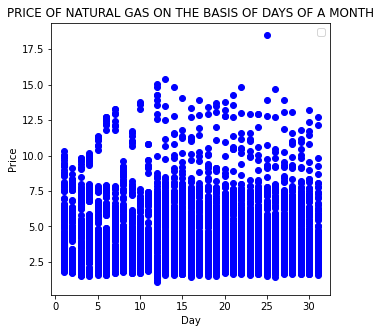

In [13]:
#import the matplotlib library
import matplotlib.pyplot as plt
#plot size
fig=plt.figure(figsize=(5,5))
plt.scatter(dataset['day'],dataset['Price'],color='blue')
#Set the label for the x-axis.
plt.xlabel('Day')
#Set the label for the y-axis.
plt.ylabel('Price')
#Set a title for the axes.
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF DAYS OF A MONTH')
#Place a legend on the axes.
plt.legend()

No handles with labels found to put in legend.


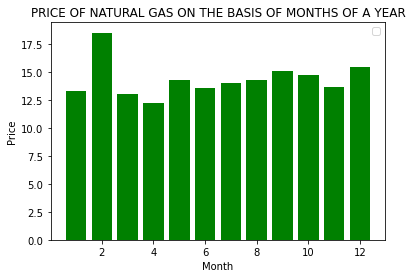

In [14]:
import matplotlib.pyplot as plt
plt.bar(dataset['month'],dataset['Price'],color='green')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')
plt.legend()

<AxesSubplot:xlabel='year', ylabel='Price'>

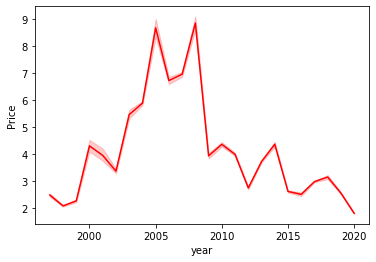

In [15]:
import seaborn as sns
sns.lineplot(x='year',y='Price',data=dataset,color='red')

No handles with labels found to put in legend.


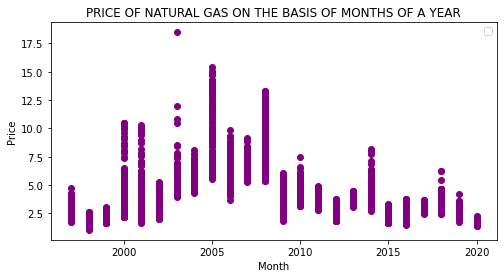

In [16]:
fig=plt.figure(figsize=(8,4))
plt.scatter(dataset['year'],dataset['Price'],color='purple')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')
plt.legend()

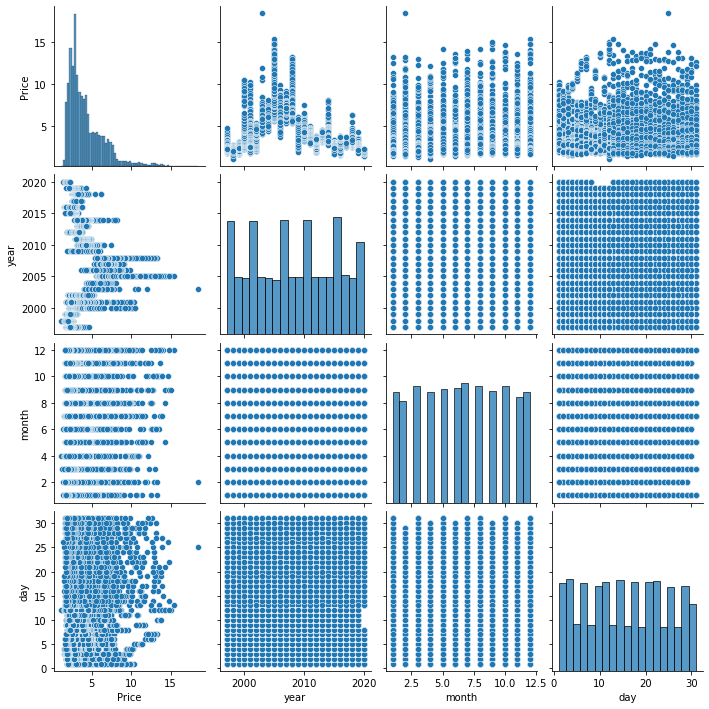

In [17]:
import seaborn as sns
sns.pairplot(dataset)
plt.show()

IT IS NOT NECESSARY TO APPLY LABEL ENCODING AND ONE HOT ENCODING AS THE DATASET DOES NOT CONTAIN ANY TEXTUAL DATA

SPLIT DATASET INTO INPUTS AND OUTPUTS

Now, Split the dataset into X(independent variable) and Y(dependent variable)

In [18]:
x=dataset.iloc[:,1:4].values #inputs
y=dataset.iloc[:,0:1].values #output price only

In [19]:
x

array([[1997,    7,    1],
       [1997,    8,    1],
       [1997,    9,    1],
       ...,
       [2020,    7,    8],
       [2020,   10,    8],
       [2020,   11,    8]], dtype=int64)

In [20]:
y

array([[3.82],
       [3.8 ],
       [3.61],
       ...,
       [2.15],
       [2.18],
       [2.19]])

SPLIT THE DATA INTO TRAIN AND TEST SETS

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,
                        test_size=0.2,random_state=0)

In [22]:
x_train.shape

(4750, 3)

In [23]:
x_test.shape

(1188, 3)

# STEP 4: BUILDING AND TESTING THE MODEL

MULTIPLE LINEAR REGRESSION

In [24]:
#importing linear regression from scikit learn library
from sklearn.linear_model import LinearRegression
#mlr is object of LinearRegression
mlr=LinearRegression()
#trainig the model using fit method
mlr.fit(x_train,y_train)

LinearRegression()

In [25]:
y_pred=mlr.predict(x_test)

In [26]:
y_pred

array([[4.16590311],
       [3.67186909],
       [4.14310246],
       ...,
       [3.94071747],
       [4.13209364],
       [4.51039115]])

In [27]:
y_test

array([[3.56],
       [3.02],
       [7.26],
       ...,
       [2.09],
       [4.01],
       [4.46]])

In [28]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)

In [29]:
accuracy

0.02877935464884418

Note: The accuracy obtained using the Multilinear Regression Algorithm is very low...Therefore we will not use this algorithm

DECISION TREE REGRESSOR

In [30]:
#import decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
#fitting the model or training the model
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

PREDICTION

In [31]:
y_pred=dtr.predict(x_test)

In [32]:
y_pred

array([3.43, 3.  , 8.24, ..., 2.16, 3.91, 4.35])

In [36]:
y_test

array([[3.56],
       [3.02],
       [7.26],
       ...,
       [2.09],
       [4.01],
       [4.46]])

ACCURACY EVALUATION

In [34]:
from sklearn.metrics import r2_score
dtraccuracy=r2_score(y_test,y_pred)

In [35]:
dtraccuracy

0.9585480046339125

RANDOM VALUE PREDICTION

In [36]:
dataset.head()

Price  year  month  day
0   3.82  1997      7    1
1   3.80  1997      8    1
2   3.61  1997      9    1
3   3.92  1997     10    1
4   4.00  1997      1   13

In [37]:
y_p=dtr.predict([[2005,12,4]])

In [38]:
y_p

array([7.34])

In [39]:
y_p=dtr.predict([[1997,1,7]])

In [40]:
y_p

array([2.16])

In [41]:
import pickle
pickle.dump(dtr,open('gas.pkl','wb'))